Menganalisis data COVID-19 
    1. Tiap Provinsi di Indonesia
    2. antara negara Indonesia dengan negara Lain

# COVID-19 DI TIAP PROVINSI DI INDONESIA

## Task 1 : import data API

Sumber Data ; https://covid19.bnpb.go.id/

In [1]:
import pandas as pd
import json
import requests

import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8

import cufflinks as cf

import folium
pyo.init_notebook_mode(connected = True)
cf.go_offline()

import numpy as np
from random import randint

import pycountry

In [2]:
api = "https://opendata.arcgis.com/datasets/0c0f4558f1e548b68a1c82112744bad3_0.geojson"

In [3]:
r = requests.get(api)
r

<Response [200]>

In [4]:
data = r.json()

In [5]:
df = pd.json_normalize(data,'features', sep = "_")

In [6]:
df

,type,properties_FID,properties_Kode_Provi,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_type,geometry_coordinates
0,Feature,1,11,Aceh,88,42,3,Point,"[96.90952274800009, 4.225081892000048]"
1,Feature,2,12,Sumatera Utara,1821,494,108,Point,"[99.05788784900005, 2.184779215000049]"
2,Feature,3,13,Sumatera Barat,780,637,31,Point,"[100.46680503000005, -0.85191434799998]"
3,Feature,4,14,Riau,236,214,11,Point,"[101.81289195400007, 0.510525849000032]"
4,Feature,5,15,Jambi,121,81,1,Point,"[103.59932, -1.61775]"
5,Feature,6,16,Sumatera Selatan,2356,1210,112,Point,"[104.17041944500005, -3.213346821999949]"
6,Feature,7,17,Bengkulu,144,96,13,Point,"[102.26312, -3.79116]"
7,Feature,8,19,Kepulauan Bangka Belitung,148,130,2,Point,"[105.98694808200008, -2.252956410999957]"
8,Feature,9,18,Lampung,201,159,12,Point,"[105.01831305100006, -4.918073086999925]"
9,Feature,10,21,Kepulauan Riau,313,263,16,Point,"[108.20222888900008, 3.915947241000026]"


### Task 2: Drop Columns

In [7]:
df.drop(columns = ['type', 'properties_FID', 'geometry_type', 'properties_Kode_Provi'],index = 34, inplace = True)

In [8]:
df

,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_coordinates
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]"
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]"
4,Jambi,121,81,1,"[103.59932, -1.61775]"
5,Sumatera Selatan,2356,1210,112,"[104.17041944500005, -3.213346821999949]"
6,Bengkulu,144,96,13,"[102.26312, -3.79116]"
7,Kepulauan Bangka Belitung,148,130,2,"[105.98694808200008, -2.252956410999957]"
8,Lampung,201,159,12,"[105.01831305100006, -4.918073086999925]"
9,Kepulauan Riau,313,263,16,"[108.20222888900008, 3.915947241000026]"


### Task 3: Rename Columns

In [9]:
df.rename(columns = {'properties_Provinsi':'Provinsi', 'properties_Kasus_Posi':"Dikonfirmasi",
                     "properties_Kasus_Semb":"Sembuh","properties_Kasus_Meni":"Meninggal Dunia",
                     "geometry_coordinates":"geometry coordinates"}, inplace = True)

In [10]:
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]"
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]"
4,Jambi,121,81,1,"[103.59932, -1.61775]"
5,Sumatera Selatan,2356,1210,112,"[104.17041944500005, -3.213346821999949]"
6,Bengkulu,144,96,13,"[102.26312, -3.79116]"
7,Kepulauan Bangka Belitung,148,130,2,"[105.98694808200008, -2.252956410999957]"
8,Lampung,201,159,12,"[105.01831305100006, -4.918073086999925]"
9,Kepulauan Riau,313,263,16,"[108.20222888900008, 3.915947241000026]"


In [11]:
df['Kasus Aktiv'] = df['Dikonfirmasi'] - df['Sembuh'] - df['Meninggal Dunia']

In [12]:
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11
4,Jambi,121,81,1,"[103.59932, -1.61775]",39
5,Sumatera Selatan,2356,1210,112,"[104.17041944500005, -3.213346821999949]",1034
6,Bengkulu,144,96,13,"[102.26312, -3.79116]",35
7,Kepulauan Bangka Belitung,148,130,2,"[105.98694808200008, -2.252956410999957]",16
8,Lampung,201,159,12,"[105.01831305100006, -4.918073086999925]",30
9,Kepulauan Riau,313,263,16,"[108.20222888900008, 3.915947241000026]",34


In [13]:
df['Sembuh %'] = df.Sembuh / df.Dikonfirmasi * 100
df['Sembuh %'] = df['Sembuh %'].round().astype('int')

In [14]:
df['Meninggal %'] = df['Meninggal Dunia'] / df.Dikonfirmasi * 100
df['Meninggal %'] = df['Meninggal %'].round().astype('int')

In [15]:
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43,48,3
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219,27,6
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112,82,4
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11,91,5
4,Jambi,121,81,1,"[103.59932, -1.61775]",39,67,1
5,Sumatera Selatan,2356,1210,112,"[104.17041944500005, -3.213346821999949]",1034,51,5
6,Bengkulu,144,96,13,"[102.26312, -3.79116]",35,67,9
7,Kepulauan Bangka Belitung,148,130,2,"[105.98694808200008, -2.252956410999957]",16,88,1
8,Lampung,201,159,12,"[105.01831305100006, -4.918073086999925]",30,79,6
9,Kepulauan Riau,313,263,16,"[108.20222888900008, 3.915947241000026]",34,84,5


### Task 4: Dataframe Visualization

In [16]:
df.style.background_gradient(cmap = "Reds")

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43,48,3
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219,27,6
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112,82,4
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11,91,5
4,Jambi,121,81,1,"[103.59932, -1.61775]",39,67,1
5,Sumatera Selatan,2356,1210,112,"[104.17041944500005, -3.213346821999949]",1034,51,5
6,Bengkulu,144,96,13,"[102.26312, -3.79116]",35,67,9
7,Kepulauan Bangka Belitung,148,130,2,"[105.98694808200008, -2.252956410999957]",16,88,1
8,Lampung,201,159,12,"[105.01831305100006, -4.918073086999925]",30,79,6
9,Kepulauan Riau,313,263,16,"[108.20222888900008, 3.915947241000026]",34,84,5


In [17]:
kasus_aktiv_ = df.groupby("Provinsi")["Kasus Aktiv"].sum().sort_values(ascending = False).to_frame()
kasus_aktiv_.style.background_gradient(cmap = "Reds")

,Kasus Aktiv
Provinsi,
Jawa Timur,8272
DKI Jakarta,3982
Sulawesi Selatan,3577
Jawa Tengah,2956
Kalimantan Selatan,2469
Jawa Barat,1804
Sumatera Utara,1219
Papua,1081
Sumatera Selatan,1034


In [18]:
Dikonfirmasi_ = df.groupby("Provinsi")["Dikonfirmasi"].sum().sort_values(ascending = False).to_frame()
Dikonfirmasi_.style.background_gradient(cmap = "Reds")

,Dikonfirmasi
Provinsi,
Jawa Timur,14321
DKI Jakarta,12667
Sulawesi Selatan,5974
Jawa Tengah,4738
Jawa Barat,3700
Kalimantan Selatan,3628
Sumatera Selatan,2356
Papua,2027
Bali,1900


In [19]:
Sembuh_ = df.groupby("Provinsi")["Sembuh"].sum().sort_values(ascending = False).to_frame()
Sembuh_.style.background_gradient(cmap = "Reds")

,Sembuh
Provinsi,
DKI Jakarta,8036
Jawa Timur,4996
Sulawesi Selatan,2197
Jawa Barat,1718
Jawa Tengah,1567
Sumatera Selatan,1210
Bali,974
Kalimantan Selatan,957
Banten,949


In [20]:
Meninggal_ = df.groupby("Provinsi")["Meninggal Dunia"].sum().sort_values(ascending = False).to_frame()
Meninggal_.style.background_gradient(cmap = "Reds")

,Meninggal Dunia
Provinsi,
Jawa Timur,1053
DKI Jakarta,649
Jawa Tengah,215
Kalimantan Selatan,202
Sulawesi Selatan,200
Jawa Barat,178
Sumatera Selatan,112
Sumatera Utara,108
Sulawesi Utara,90


### Task 5: Graphical Visualization

Using Pandas PLot

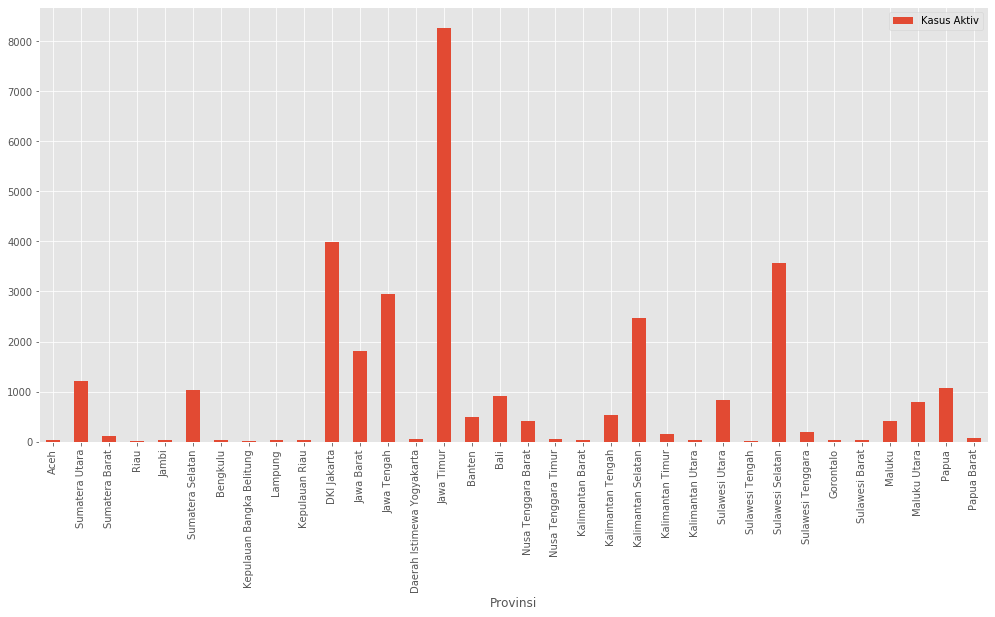

In [21]:
df.plot(kind = "bar", x = "Provinsi", y = "Kasus Aktiv", figsize = (17,8))


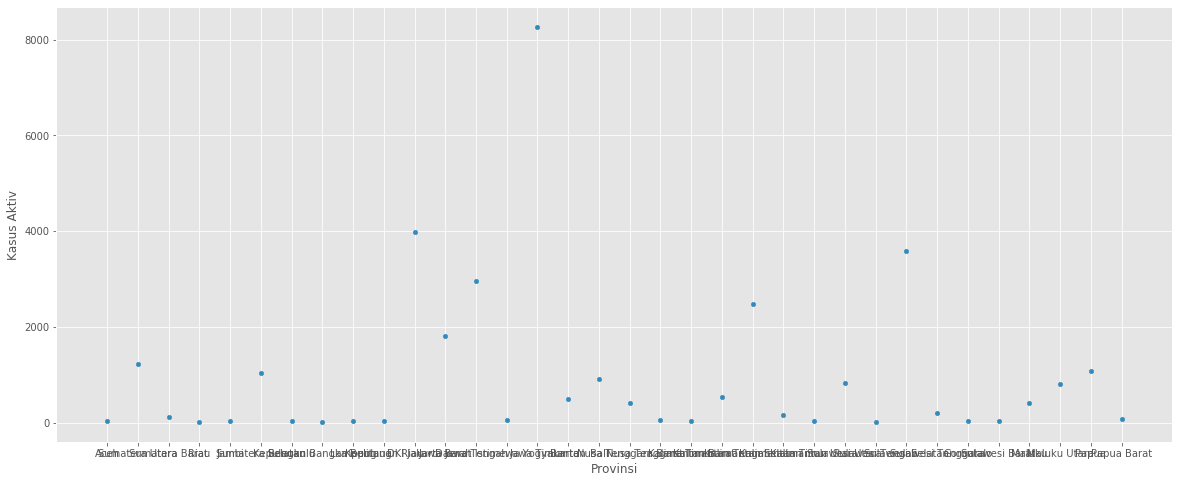

In [22]:
df.plot(kind = "scatter", x = "Provinsi", y = "Kasus Aktiv")

Using Matplotlib Plot

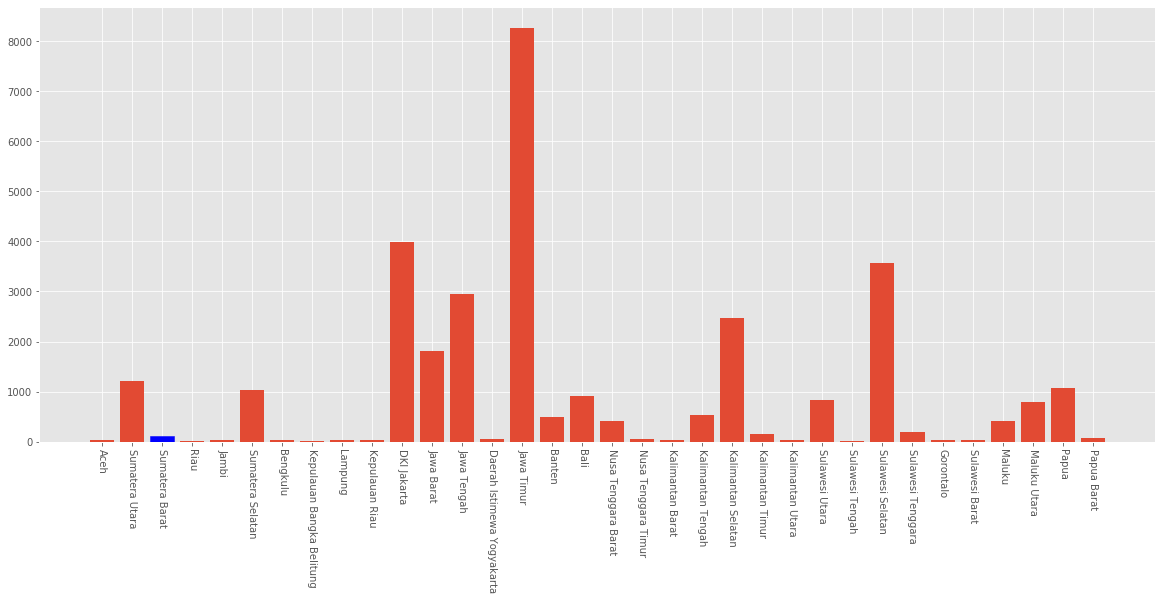

In [23]:
color = plt.bar(df["Provinsi"], df["Kasus Aktiv"])
color[2].set_color('blue')
plt.xticks( rotation =270)
plt.show()

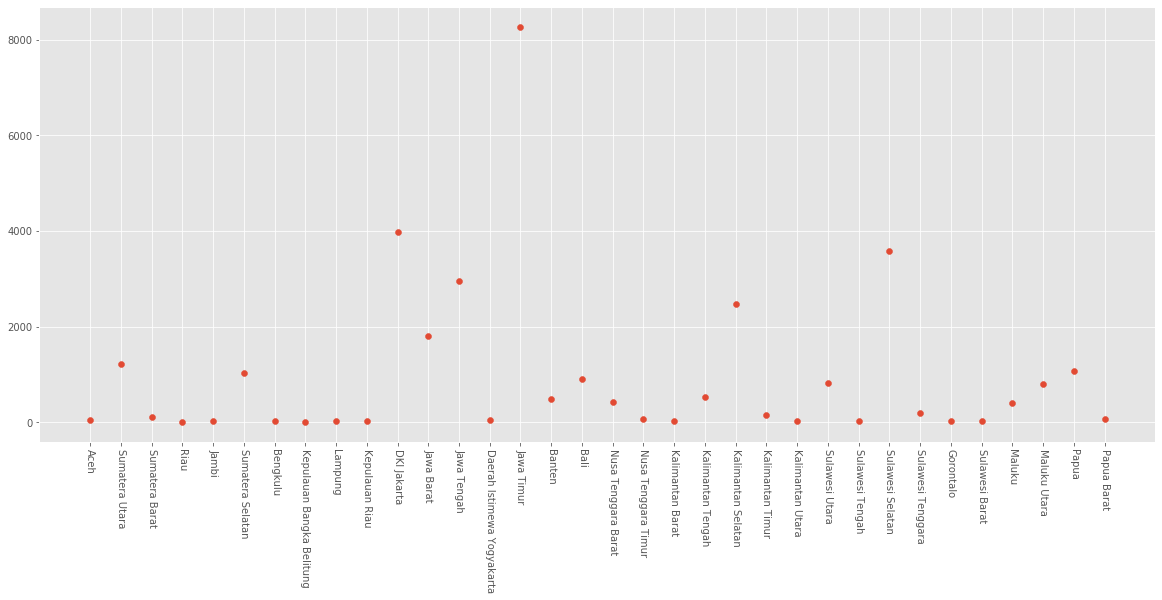

In [24]:
plt.scatter(df["Provinsi"], df["Kasus Aktiv"])
plt.xticks( rotation =270)
plt.show()

Using Plotly Plot

In [25]:
df.iplot(kind = "bar", x = "Provinsi", y = "Kasus Aktiv")

In [26]:
df.iplot(kind = "scatter", x = "Provinsi", y = "Kasus Aktiv", mode = "lines+markers+text", colors = 'red')

Using Plotly Express

In [27]:
px.bar(df, x = "Provinsi", y = "Kasus Aktiv")

In [28]:
px.scatter(df, x = "Provinsi", y = "Kasus Aktiv")

In [29]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43,48,3
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219,27,6
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112,82,4
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11,91,5
4,Jambi,121,81,1,"[103.59932, -1.61775]",39,67,1


In [30]:
plotdata = df.loc[: ,["Provinsi","Kasus Aktiv", "Sembuh", "Meninggal Dunia"] ]

In [31]:
plotdata.set_index("Provinsi", inplace = True)

In [32]:
plotdata = plotdata.sort_values(by = "Kasus Aktiv", ascending = False)

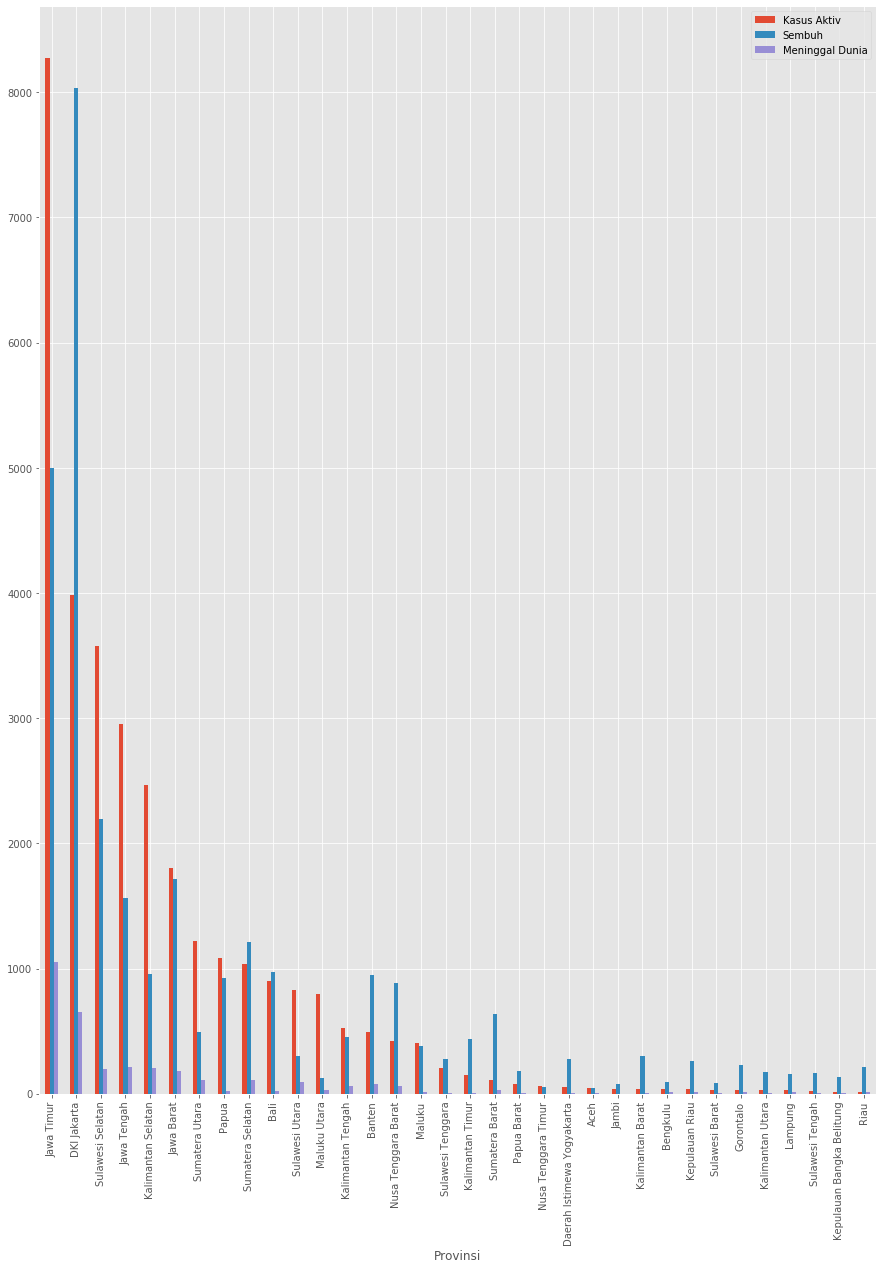

In [33]:
plotdata.plot(kind = "bar", stacked = False, figsize = (15,20))

In [34]:
plotdata.head()

,Kasus Aktiv,Sembuh,Meninggal Dunia
Provinsi,,,
Jawa Timur,8272,4996,1053
DKI Jakarta,3982,8036,649
Sulawesi Selatan,3577,2197,200
Jawa Tengah,2956,1567,215
Kalimantan Selatan,2469,957,202


In [35]:
df_sort = df.sort_values(by = "Dikonfirmasi", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Dikonfirmasi', y='Provinsi',
             color='Dikonfirmasi', orientation='h', text = 'Dikonfirmasi', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [36]:
df_sort = df.sort_values(by = "Sembuh", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Sembuh', y='Provinsi',
             color='Sembuh', orientation='h', text = 'Sembuh', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [37]:
df_sort = df.sort_values(by = "Meninggal Dunia", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Meninggal Dunia', y='Provinsi',
             color='Meninggal Dunia', orientation='h', text = 'Meninggal Dunia', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [38]:
df_sort_5_1 = df_sort.nlargest(8, "Sembuh")
df_sort_5_1.sort_values(by = "Sembuh", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Sembuh',
             color='Sembuh', text = 'Sembuh')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [39]:
df_sort_5_2 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_2.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_2, x='Provinsi', y='Dikonfirmasi',
             color='Dikonfirmasi', text = 'Dikonfirmasi')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [40]:
df_sort_5_3 = df_sort.nlargest(8, "Meninggal Dunia")
df_sort_5_3.sort_values(by = "Meninggal Dunia", ascending = False, inplace = True)
fig = px.bar(df_sort_5_3, x='Provinsi', y='Meninggal Dunia',
             color='Meninggal Dunia', text = 'Meninggal Dunia')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [41]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43,48,3
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219,27,6
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112,82,4
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11,91,5
4,Jambi,121,81,1,"[103.59932, -1.61775]",39,67,1


In [42]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Sembuh %"],
             color='Sembuh %', text = 'Sembuh %')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [43]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Meninggal %"],
             color='Meninggal %', text = 'Meninggal %')
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Using Folium

In [44]:
map = folium.Map(location=[-0.789275,113.921327], zoom_start = 4.3, tiles = 'Stamenterrain')

In [45]:
map


In [46]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,88,42,3,"[96.90952274800009, 4.225081892000048]",43,48,3
1,Sumatera Utara,1821,494,108,"[99.05788784900005, 2.184779215000049]",1219,27,6
2,Sumatera Barat,780,637,31,"[100.46680503000005, -0.85191434799998]",112,82,4
3,Riau,236,214,11,"[101.81289195400007, 0.510525849000032]",11,91,5
4,Jambi,121,81,1,"[103.59932, -1.61775]",39,67,1


In [47]:
df.loc[:, 'latitude'] = df['geometry coordinates'].map(lambda x: x[0])

In [48]:
df.loc[:, 'longitude'] = df['geometry coordinates'].map(lambda x: x[1])

In [49]:
df.drop(columns = 'geometry coordinates', inplace = True)

In [50]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,Kasus Aktiv,Sembuh %,Meninggal %,latitude,longitude
0,Aceh,88,42,3,43,48,3,96.909523,4.225082
1,Sumatera Utara,1821,494,108,1219,27,6,99.057888,2.184779
2,Sumatera Barat,780,637,31,112,82,4,100.466805,-0.851914
3,Riau,236,214,11,11,91,5,101.812892,0.510526
4,Jambi,121,81,1,39,67,1,103.599320,-1.617750


In [51]:
map = folium.Map(location=[-0.789275,113.921327], zoom_start = 4, tiles = 'openstreetmap')

for lat,long,value,name in zip(df['longitude'],df['latitude'],df['Dikonfirmasi'],df['Provinsi']):
    folium.CircleMarker([lat,long],radius=value*0.006,popup=('<strong>Provinsi</strong>: '+ str(name).capitalize()+'<br>''<strong>Dikonfirmasi</strong>: ' + str(value)+'<br>'),color='red', fill_color = 'red',fill_opacity=0.3).add_to(map)

In [52]:
map

In [53]:
  
#  Author:- Anurag Gupta # email:- 999.anuraggupta@gmail.com
# This code and related article was published here:-
# https://opensource.com/article/20/4/python-map-covid-19
import pycountry
import plotly.express as px
import pandas as pd
# ----------- Step 1 ------------
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head) # Uncomment to see what the dataframe is like
# ----------- Step 2 ------------
list_countries = df1['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

# print(df1.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = df1, 
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country",
                    color_continuous_scale= ["yellow","red","black"],  #  color scale red, yellow green
                    animation_frame= "Date")

fig.show()

could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> West Bank and Gaza
